# Breast Cancer Detection for Implant Enabled
## By [Johann](https://www.linkedin.com/in/johann-pineda-97992a235)
# About Dataset
## Goal of the Competition
The goal of this competition is to identify breast cancer. You'll train your model with screening mammograms obtained from regular screening.

Your work improving the automation of detection in screening mammography may enable radiologists to be more accurate and efficient, improving the quality and safety of patient care. It could also help reduce costs and unnecessary medical procedures.

## Context
According to the WHO, breast cancer is the most common cancer worldwide. In 2020 alone, there were 2.3 million new breast cancer diagnoses and 685,000 deaths. Yet breast cancer mortality in high-income countries had dropped by 40% since the 1980s when health authorities implemented regular mammography screening in at-risk age groups. Early detection and treatment are critical to reducing cancer fatalities, and your machine-learning skills could help streamline the process radiologists use to evaluate screening mammograms.

Currently, early detection of breast cancer requires the expertise of highly-trained human observers, making screening mammography programs expensive to conduct. A looming shortage of radiologists in several countries will likely worsen this problem. Mammography screening also leads to a high incidence of false positive results. This can result in unnecessary anxiety, inconvenient follow-up care, extra imaging tests, and sometimes a need for tissue sampling (often a needle biopsy).

The competition host, the Radiological Society of North America (RSNA) is a non-profit organization that represents 31 radiologic subspecialties from 145 countries around the world. RSNA promotes excellence in patient care and health care delivery through education, research, and technological innovation.

Your efforts in this competition could help extend the benefits of early detection to a broader population. Greater access could further reduce breast cancer mortality worldwide.

We have data for patients with breast implants.

# Data Setup

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load the training and validation data
train_ds = image_dataset_from_directory(
    "/kaggle/input/breast-cancer-detection-for-implant-enabled/train",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
)

val_ds = image_dataset_from_directory(
    "/kaggle/input/breast-cancer-detection-for-implant-enabled/train",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Found 1904 files belonging to 2 classes.
Using 1524 files for training.
Found 1904 files belonging to 2 classes.
Using 380 files for validation.


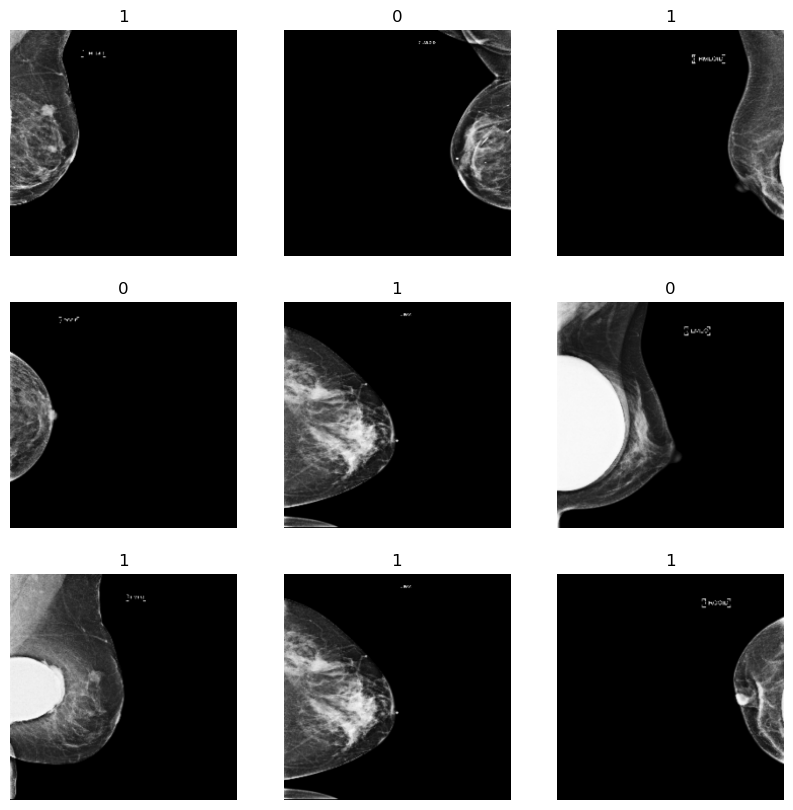

In [3]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from the train_ds dataset
images, labels = next(iter(train_ds))

# Set up the figure
plt.figure(figsize=(10, 10))

# Display the first 9 images from the batch
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(int(labels[i]))
    plt.axis("off")


## Model Creation & Training

### EfficientNet model

In [4]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0

# Fine-tune the EfficientNet model
efficientnet_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
efficientnet_model.trainable = False

efficientnet_inputs = keras.Input(shape=(224, 224, 3))
efficientnet_x = efficientnet_model(efficientnet_inputs)
efficientnet_x = layers.GlobalAveragePooling2D()(efficientnet_x)
efficientnet_outputs = layers.Dense(1)(efficientnet_x)
efficientnet_model = keras.Model(efficientnet_inputs, efficientnet_outputs)

efficientnet_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

16705208/16705208 [==============================] - 0s 0us/step


In [5]:
# Training
efficientnet_history = efficientnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10


2023-08-24 17:17:22.043310: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


48/48 [==============================] - 31s 325ms/step - loss: 0.5519 - accuracy: 0.6955 - val_loss: 0.3902 - val_accuracy: 0.8605
Epoch 2/10
48/48 [==============================] - 9s 171ms/step - loss: 0.3387 - accuracy: 0.9042 - val_loss: 0.2715 - val_accuracy: 0.9737
Epoch 3/10
48/48 [==============================] - 8s 142ms/step - loss: 0.2477 - accuracy: 0.9619 - val_loss: 0.2169 - val_accuracy: 0.9711
Epoch 4/10
48/48 [==============================] - 8s 151ms/step - loss: 0.1974 - accuracy: 0.9751 - val_loss: 0.1739 - val_accuracy: 0.9737
Epoch 5/10
48/48 [==============================] - 9s 167ms/step - loss: 0.1656 - accuracy: 0.9751 - val_loss: 0.1491 - val_accuracy: 0.9763
Epoch 6/10
48/48 [==============================] - 8s 144ms/step - loss: 0.1418 - accuracy: 0.9849 - val_loss: 0.1304 - val_accuracy: 0.9789
Epoch 7/10
48/48 [==============================] - 8s 142ms/step - loss: 0.1172 - accuracy: 0.9902 - val_loss: 0.1184 - val_accuracy: 0.9789
Epoch 8/10
48/48

In [6]:
train_acc = efficientnet_history.history['accuracy']
print(train_acc)

[0.6955380439758301, 0.904199481010437, 0.9619422554969788, 0.9750655889511108, 0.9750655889511108, 0.9849081635475159, 0.9901574850082397, 0.9875327944755554, 0.9875327944755554, 0.9862204790115356]


### VGG-16 model

In [10]:
!pip install tensorflow

In [11]:
from tensorflow.keras.applications.vgg16 import VGG16
# Fine-tune the VGG-16 model
vgg16_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
vgg16_model.trainable = False

vgg16_inputs = keras.Input(shape=(224, 224, 3))
vgg16_x = vgg16_model(vgg16_inputs)
vgg16_x = layers.GlobalAveragePooling2D()(vgg16_x)
vgg16_outputs = layers.Dense(1)(vgg16_x)
vgg16_model = keras.Model(vgg16_inputs, vgg16_outputs)

vgg16_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

58889256/58889256 [==============================] - 0s 0us/step


In [12]:
# Training
vgg16_history = vgg16_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
48/48 [==============================] - 22s 326ms/step - loss: 0.9773 - accuracy: 0.5171 - val_loss: 0.4912 - val_accuracy: 0.7711
Epoch 2/10
48/48 [==============================] - 9s 172ms/step - loss: 0.3625 - accuracy: 0.8314 - val_loss: 0.2435 - val_accuracy: 0.9263
Epoch 3/10
48/48 [==============================] - 9s 172ms/step - loss: 0.2023 - accuracy: 0.9547 - val_loss: 0.1572 - val_accuracy: 0.9868
Epoch 4/10
48/48 [==============================] - 10s 188ms/step - loss: 0.1372 - accuracy: 0.9810 - val_loss: 0.1199 - val_accuracy: 0.9895
Epoch 5/10
48/48 [==============================] - 9s 176ms/step - loss: 0.1042 - accuracy: 0.9895 - val_loss: 0.0880 - val_accuracy: 0.9895
Epoch 6/10
48/48 [==============================] - 9s 175ms/step - loss: 0.0822 - accuracy: 0.9908 - val_loss: 0.0710 - val_accuracy: 0.9974
Epoch 7/10
48/48 [==============================] - 10s 189ms/step - loss: 0.0671 - accuracy: 0.9928 - val_loss: 0.0613 - val_accuracy: 0.9974
Epo

In [13]:
train_acc = vgg16_history.history['accuracy']
print(train_acc)

[0.5170603394508362, 0.8313648104667664, 0.9547244310379028, 0.9809711575508118, 0.9895012974739075, 0.990813672542572, 0.9927821755409241, 0.9954068064689636, 0.9954068064689636, 0.9954068064689636]


## Results 

### EfficientNet model

In [15]:
test_ds = image_dataset_from_directory(
    "/kaggle/input/breast-cancer-detection-for-implant-enabled/test",
    image_size=(224, 224),
    batch_size=32,
)

test_loss, test_acc = efficientnet_model.evaluate(test_ds)

Found 241 files belonging to 2 classes.
8/8 [==============================] - 2s 157ms/step - loss: 0.1042 - accuracy: 0.9876


In [16]:
print(f'Test accuracy: {test_acc:.2f}')

Test accuracy: 0.99


### VGG-16 model

In [17]:
test_ds = image_dataset_from_directory(
    "/kaggle/input/breast-cancer-detection-for-implant-enabled/test",
    image_size=(224, 224),
    batch_size=32,
)

test_loss, test_acc = vgg16_model.evaluate(test_ds)

Found 241 files belonging to 2 classes.
8/8 [==============================] - 5s 514ms/step - loss: 0.0415 - accuracy: 0.9917


In [18]:
print(f'Test accuracy: {test_acc:.2f}')

Test accuracy: 0.99
